In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rhanalyze

In [7]:
rhd1 = rhanalyze.rhout('/home/han/Source/rh_v2/rhf1d/run')
##rhd2 = rhanalyze.rhout('/home/han/Source/rh_v2/rhsc2d/run')
rhd2 = rhanalyze.rhout('/home/han/Source/rh_v2/rhf1d/run_triplet_5476')
rhd3 = rhanalyze.rhout('/home/han/Source/rh_v2/rhsc3d/run_cont_500nm')

In [8]:
print(rhd1.inputs.filename)
print(rhd1.inputs.metallicity)

/home/han/Source/rh_v2/rhf1d/run/input.out
0.0


In [9]:
print(rhd1.geometry.filename)
print(rhd1.geometry.type)
print(rhd1.geometry.Nrays)

/home/han/Source/rh_v2/rhf1d/run/geometry.out
ONE_D_PLANE
5


In [10]:
print("{:.3f}".format(sum(rhd1.geometry.wmu)))

1.000


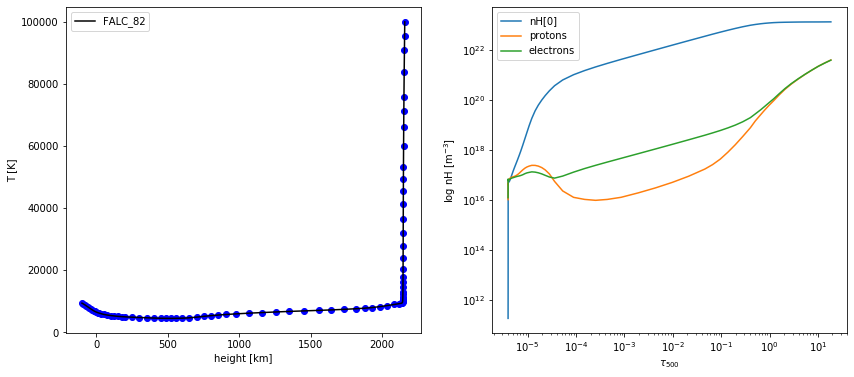

In [11]:
KM_TO_M = 1.0E3

height = rhd1.geometry.height/ KM_TO_M
tau500 = rhd1.geometry.tau500

plt.figure(figsize=[14,6])

plt.subplot(121)
plt.plot(height, rhd1.atmos.T, 'bo')
plt.plot(height, rhd1.atmos.T, 'k', label=rhd1.atmos.ID)
plt.xlabel('height [km]')
plt.ylabel('T [K]')
plt.legend()

plt.subplot(122)
plt.plot(tau500, rhd1.atmos.nH[:,0], label='nH[0]')
plt.plot(tau500, rhd1.atmos.nH[:,5], label='protons')
plt.plot(tau500, rhd1.atmos.n_elec, label='electrons')
plt.xlabel(r'$\tau_{500}$')
plt.ylabel('log nH [m$^{-3}$]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()

In [12]:
print(rhd1.atmos.nH.shape)
'Atom: {0}, weight: {1:.4f}'.format(rhd1.atmos.elements[19].ID, rhd1.atmos.elements[19].weight)

(82, 6)


'Atom: CA, weight: 40.0800'

In [13]:
print(rhd1.spectrum.I.shape)

(5, 795)


In [1]:
xmu = rhd1.geometry.xmu

plt.figure(figsize=[9, 6])
plt.xlim([655.28, 657.28])

plt.plot(rhd1.spectrum.waves, rhd1.rays[1].I,\
         label="{:.2f}".format(rhd1.rays[1].muz), linewidth=4.0)

for mu in range(rhd1.geometry.Nrays-1, -1, -1):
  xmulabel = "{:.2f}".format(xmu[mu])
  plt.plot(rhd1.spectrum.waves, rhd1.spectrum.I[mu, :], label=xmulabel)

plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')

plt.legend(title='mu')
plt.show()

NameError: name 'rhd1' is not defined

1
1.0


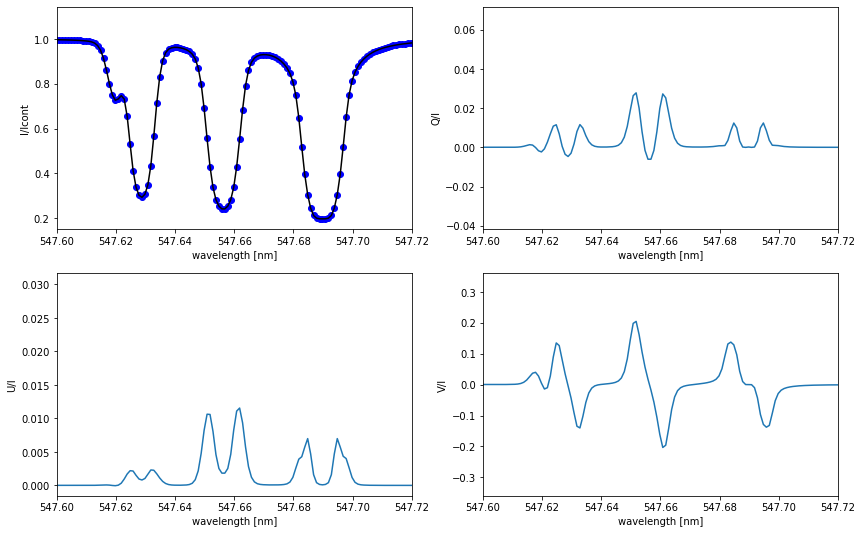

In [15]:
print(len(rhd2.rays))
for n in range(len(rhd2.rays)): print(rhd2.rays[n].muz)

myplot = plt.figure(figsize=[14, 9])
xlim = [547.6, 547.72]
plt.xlabel('wavelength [nm]')

plt.subplot(221)
plt.xlabel('wavelength [nm]')
plt.ylabel('I/Icont')
plt.xlim(xlim)
plt.plot(rhd2.spectrum.waves, rhd2.rays[0].I/rhd2.rays[0].I[1], 'bo',\
         rhd2.spectrum.waves, rhd2.rays[0].I/rhd2.rays[0].I[1], 'k')

plt.subplot(222)
plt.xlabel('wavelength [nm]')
plt.ylabel('Q/I')
plt.xlim(xlim)
plt.plot(rhd2.spectrum.waves, rhd2.rays[0].Q/rhd2.rays[0].I)

plt.subplot(223)
plt.xlabel('wavelength [nm]')
plt.ylabel('U/I')
plt.xlim(xlim)
plt.plot(rhd2.spectrum.waves, rhd2.rays[0].U/rhd2.rays[0].I)

plt.subplot(224)
plt.xlabel('wavelength [nm]')
plt.ylabel('V/I')
plt.xlim(xlim)
plt.plot(rhd2.spectrum.waves, rhd2.rays[0].V/rhd2.rays[0].I)

plt.show()

##myplot.savefig("5476_triplet.pdf", bbox_inches='tight')

In [16]:
print(rhd1.atoms[0].labels[0])
print(rhd1.atoms[0].active)
print(rhd1.atoms[0].Nlevel, rhd1.atoms[0].Nline, rhd1.atoms[0].Nlevel, rhd1.atoms[0].Nfixed)
print(rhd1.atoms[0].abund, rhd1.atoms[0].weight)

H I 1S 2SE
1
6 10 6 0
1.0 1.008


In [17]:
print(rhd1.atoms[0].labels)
print(rhd1.atoms[0].n.shape)

{0: 'H I 1S 2SE', 1: 'H I 2P 2PO', 2: 'H I 3D 2DE', 3: 'H I 4F 2FO', 4: 'H I 5G 2GE', 5: 'H II continuum'}
(82, 6)


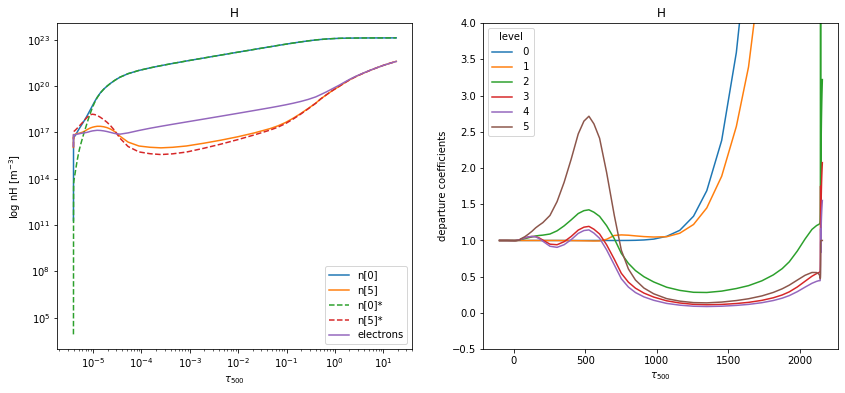

In [18]:
plt.figure(figsize=[14,6])

plt.subplot(121)
plt.plot(rhd1.geometry.tau500, rhd1.atoms[0].n[:,0], label='n[0]')
plt.plot(rhd1.geometry.tau500, rhd1.atoms[0].n[:,5], label='n[5]')
plt.plot(rhd1.geometry.tau500, rhd1.atoms[0].nstar[:, 0], '--', label='n[0]*')
plt.plot(rhd1.geometry.tau500, rhd1.atoms[0].nstar[:, 5], '--', label='n[5]*')
plt.plot(rhd1.geometry.tau500, rhd1.atmos.n_elec, label='electrons')
plt.xlabel(r'$\tau_{500}$')
plt.ylabel('log nH [m$^{-3}$]')
plt.xscale('log')
plt.yscale('log')
plt.title(rhd1.atoms[0].atomID)
plt.legend()

plt.subplot(122)
for i in range(rhd1.atoms[0].Nlevel):
    plt.plot(rhd1.geometry.height/KM_TO_M, rhd1.atoms[0].n[:, i]/rhd1.atoms[0].nstar[:, i],\
             label='{:2d}'.format(i))

plt.xlabel('height [km]')
plt.ylabel('departure coefficients')
plt.ylim([-0.5, 4.0])
plt.legend(title='level')
plt.title(rhd1.atoms[0].atomID)

plt.show()

(82, 6, 6)


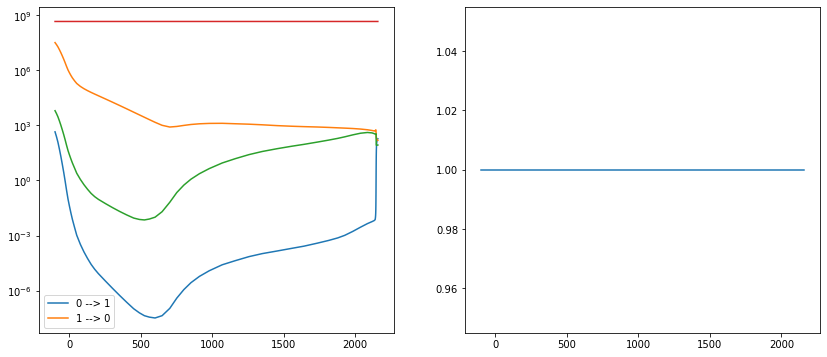

In [19]:
print(rhd1.atoms[0].Cij.shape)
plt.figure(figsize=[14, 6])

plt.subplot(121)
plt.plot(rhd1.geometry.height/KM_TO_M, rhd1.atoms[0].Cij[:, 0,1], label='0 --> 1')
plt.plot(rhd1.geometry.height/KM_TO_M, rhd1.atoms[0].Cij[:, 1,0], label='1 --> 0')
plt.plot(rhd1.geometry.height/KM_TO_M, rhd1.atoms[0].transition[0].Rij)
plt.plot(rhd1.geometry.height/KM_TO_M, rhd1.atoms[0].transition[0].Rji)
plt.yscale("log")
plt.legend()

dbup = rhd1.atoms[0].nstar[:,0] * rhd1.atoms[0].Cij[:,0,1]
dbdw = rhd1.atoms[0].nstar[:,1] * rhd1.atoms[0].Cij[:,1,0]

plt.subplot(122)
plt.plot(rhd1.geometry.height/KM_TO_M, dbup/dbdw)

plt.show()

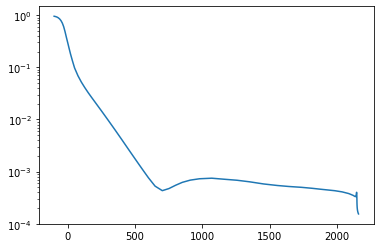

In [20]:
eps = rhd1.atoms[0].Cij[:,2,1] / (rhd1.atoms[0].transition[4].Rji + rhd1.atoms[0].Cij[:,2,1])
plt.plot(rhd1.geometry.height/KM_TO_M, eps)
plt.yscale("log")
plt.show()

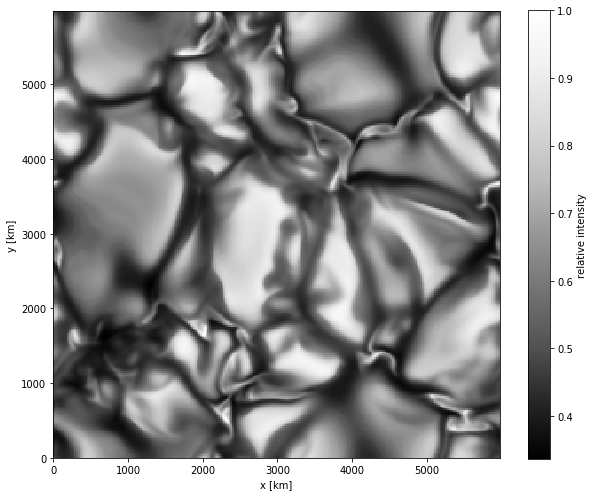

In [61]:
xkm = rhd3.geometry.dx / KM_TO_M * np.arange(rhd3.geometry.Nx, dtype="float")
plt.figure(figsize=[10,10])
rel_int = np.squeeze(rhd3.spectrum.I)
rel_int = rel_int /rel_int.max()
cmap = plt.cm.Greys
cmap_rev = cmap.reversed()
im = plt.imshow(rel_int, cmap=cmap_rev, \
           extent=[0, xkm.max(), 0, xkm.max()], origin="lower")
plt.xlabel('x [km]')
plt.ylabel('y [km]')

plt.colorbar(im, shrink=0.825, label='relative intensity')

plt.show()